Parte 2 do desafio TelecomX_BR
Aqui vamos utilizar o arquivo extraído e tratado no segundo desafio, ele está em CSV.

Tratamento dos Dados

In [4]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Carrega o dataset tratado salvo na Parte 1
df = pd.read_csv("telecom_churn_tratado.csv")

print("Dataset carregado:", df.shape)
df.head()

Saving telecom_churn_tratado.csv to telecom_churn_tratado.csv
Dataset carregado: (7267, 21)


,customerID,Churn,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,...,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,Contas_Diarias
0,0002-ORFBO,no,One year,Yes,Mailed check,65.6,Female,0,Yes,Yes,...,Yes,No,DSL,No,Yes,No,Yes,Yes,No,2.186667
1,0003-MKNFE,no,Month-to-month,No,Mailed check,59.9,Male,0,No,No,...,Yes,Yes,DSL,No,No,No,No,No,Yes,1.996667
2,0004-TLHLJ,yes,Month-to-month,Yes,Electronic check,73.9,Male,0,No,No,...,Yes,No,Fiber optic,No,No,Yes,No,No,No,2.463333
3,0011-IGKFF,yes,Month-to-month,Yes,Electronic check,98.0,Male,1,Yes,No,...,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,3.266667
4,0013-EXCHZ,yes,Month-to-month,Yes,Mailed check,83.9,Female,1,Yes,No,...,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,2.796667


Eliminar colunas que não trazem valor para a análise ou para os modelos preditivos, como identificadores únicos (por exemplo, o ID do cliente). Essas colunas não ajudam na previsão da evasão e podem até prejudicar o desempenho dos modelos.

In [9]:
print(df.columns)

df = df.drop(columns=['customerID']) #Coluna decorativa, não vai nos ajudar

print('Colunas finas')
print(df.columns.tolist())

Index(['customerID', 'Churn', 'account_Contract', 'account_PaperlessBilling',
       'account_PaymentMethod', 'account_Charges', 'customer_gender',
       'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents',
       'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines',
       'internet_InternetService', 'internet_OnlineSecurity',
       'internet_OnlineBackup', 'internet_DeviceProtection',
       'internet_TechSupport', 'internet_StreamingTV',
       'internet_StreamingMovies', 'Contas_Diarias'],
      dtype='object')
Colunas finas
['Churn', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'

Transformar as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning. Utilize um método de codificação adequado, como o one-hot encoding.

In [10]:
colunas_categoricas = [
    'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod',
    'customer_gender', 'customer_Partner', 'customer_Dependents',
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_InternetService', 'internet_OnlineSecurity',
    'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]

df_encoded = pd.get_dummies(df,columns=colunas_categoricas, drop_first=True) #encoding dummies pareceu mais simples, para uma exploração incial

print('Formato finalizado:', df_encoded.shape)
print(df_encoded.head())

Formato finalizado: (7267, 31)
  Churn  account_Charges  customer_SeniorCitizen  customer_tenure  \
0    no             65.6                       0                9   
1    no             59.9                       0                9   
2   yes             73.9                       0                4   
3   yes             98.0                       1               13   
4   yes             83.9                       1                3   

   Contas_Diarias  account_Contract_One year  account_Contract_Two year  \
0        2.186667                       True                      False   
1        1.996667                      False                      False   
2        2.463333                      False                      False   
3        3.266667                      False                      False   
4        2.796667                      False                      False   

   account_PaperlessBilling_Yes  \
0                          True   
1                         False  

Calcular a proporção de clientes que evadiram em relação aos que permaneceram ativos. Avalie se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.

In [11]:
#garantir que churn está convertida para string
df['Churn'] = df['Churn'].astype(str).str.strip().str.lower()

#contagem de valores únicos
contagem_churn = df['Churn'].value_counts()
print('Contagem de clientes com base em Churn')
print(contagem_churn)

#Ter essa proporção com normalize
proporcao_churn = df['Churn'].value_counts(normalize=True)
print('\nProporção de cliente com base em Churn:')
print(proporcao_churn)

Contagem de clientes com base em Churn
Churn
no     5174
yes    1869
nan     224
Name: count, dtype: int64

Proporção de cliente com base em Churn:
Churn
no     0.711986
yes    0.257190
nan    0.030824
Name: proportion, dtype: float64


In [17]:
import numpy as np

#Estava tendo dificuldade em usar só dropna para tirar as nan
#Converter tudo para string, tirando espaços e etc
df['Churn'] = df['Churn'].astype(str).str.strip().str.lower()

#Substituir essas strings vazias
df['Churn'] = df['Churn'].replace({'': np.nan, 'nan': np.nan})

#garantir que vai manter yes e no
df = df[df['Churn'].isin(['yes', 'no'])]

df = df.dropna(subset=['Churn'])

print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))

Churn
no     5174
yes    1869
Name: count, dtype: int64
Churn
no     0.73463
yes    0.26537
Name: proportion, dtype: float64


Total de clientes = 7043


*   Clientes que permaneceram (no) = 5174 Cliente - 73%
*   Clientes que evadiram (yes) = 1869 -27%

Assim, temos um equilíbrio até que moderado, mas podemos ter um viés para a classe majoritária, ou seja, perver quem permaneceu com mais frequência.



# Correlação e Seleção de variáveis
Visualizar a matriz de correlação para identificar relações entre variáveis numéricas. Observe especialmente quais variáveis apresentam maior correlação com a evasão, pois elas podem ser fortes candidatas para o modelo preditivo.

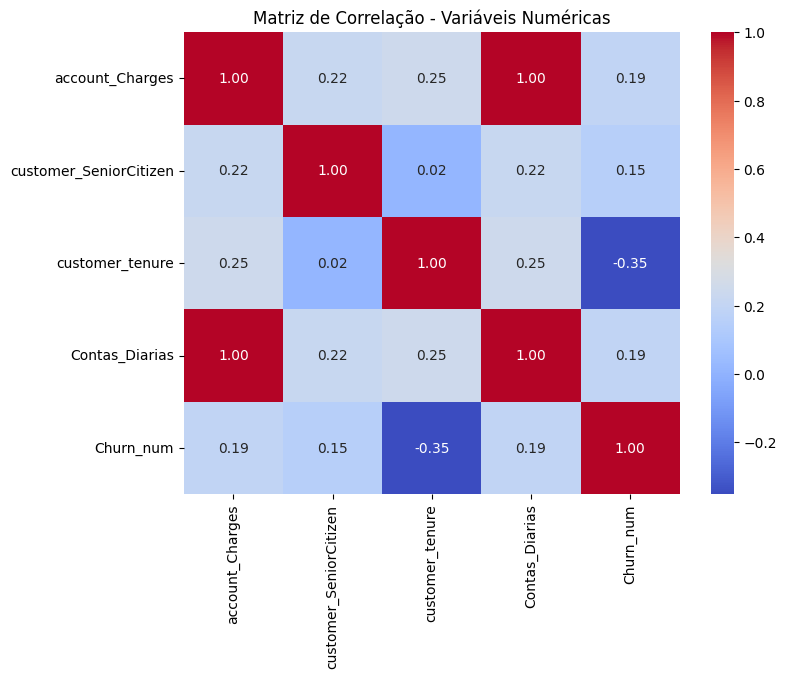

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

#Coverter o churn para variável numérica
df['Churn_num'] = df['Churn'].map({'no':0, 'yes': 1})

#Colunas numéricas
numeric_cols = ['account_Charges', 'customer_SeniorCitizen', 'customer_tenure', 'Contas_Diarias', 'Churn_num']

#matriz de correlacionamento
corr_matrix = df[numeric_cols].corr()

#usando heatmap para visualizar
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.show()

Investigar como variáveis específicas se relacionam com a evasão, como: Tempo de contrato × Evasão Total gasto × Evasão Utilize gráficos como boxplots ou dispersão (scatter plots) para visualizar padrões e possíveis tendências.

/tmp/ipython-input-2192558581.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Churn', y=col, palette='Set2')


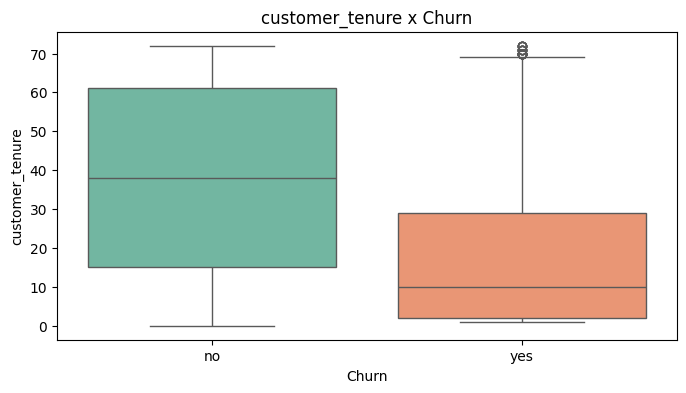

/tmp/ipython-input-2192558581.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Churn', y=col, palette='Set2')


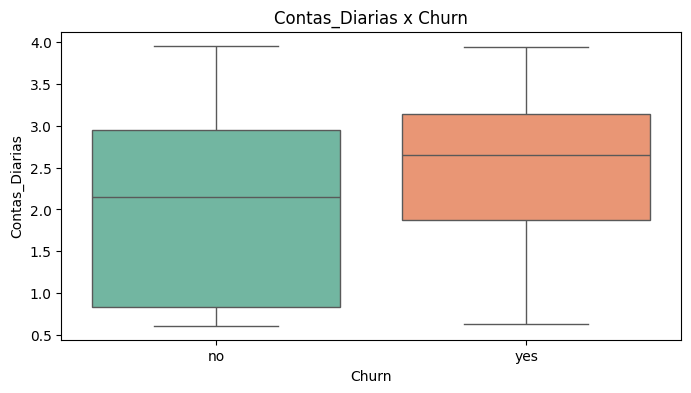

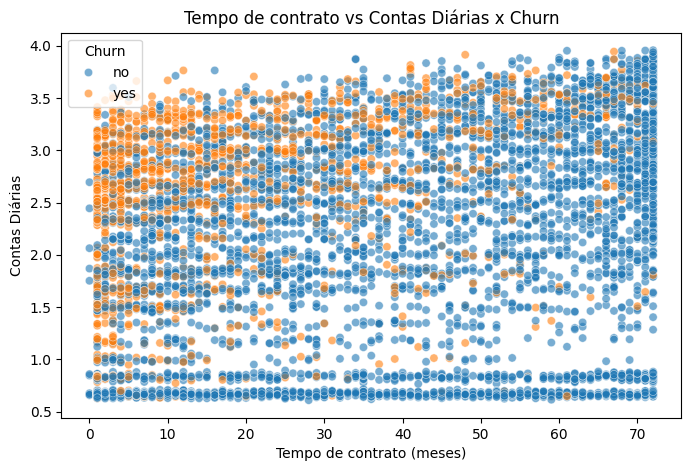

In [20]:
df_plot = df[df['Churn'].isin(['yes','no'])] # remover valores que estão inválidos
numeric_cols = ['customer_tenure', 'Contas_Diarias']

for col in numeric_cols: #usando boxplots
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_plot, x='Churn', y=col, palette='Set2')
    plt.title(f'{col} x Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

plt.figure(figsize=(8,5)) #scatter plots para identificar relações contínuas entre variáveis numéricas e o churn
sns.scatterplot(data=df_plot, x='customer_tenure', y='Contas_Diarias', hue='Churn', alpha=0.6)
plt.title('Tempo de contrato vs Contas Diárias x Churn')
plt.xlabel('Tempo de contrato (meses)')
plt.ylabel('Contas Diárias')
plt.show()


# Modelagem preditiva

Dividir o conjunto de dados em treino e teste para avaliar o desempenho do modelo. Uma divisão comum é 70% para treino e 30% para teste, ou 80/20, dependendo do tamanho da base de dados.

In [23]:
#usar a função train_teste para um treino teste

from sklearn.model_selection import train_test_split

# Selecionando features e target
X = df.drop(columns= ['Churn'])
y = df['Churn'].map({'no': 0, 'yes': 1})

#divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#conferir
print(f'Tamanho de treino: {X_train.shape[0]} amostras')
print(f'Tamanho do teste: {X_test.shape[0]} amostras')


Tamanho de treino: 4930 amostras
Tamanho do teste: 2113 amostras


Criar pelo menos dois modelos diferentes para prever a evasão de clientes.

Um modelo pode exigir normalização, como Regressão Logística ou KNN.

O outro modelo pode não exigir normalização, como Árvore de Decisão ou Random Forest.

💡 A escolha de aplicar ou não a normalização depende dos modelos selecionados. Ambos os modelos podem ser criados sem normalização, mas a combinação de modelos com e sem normalização também é uma opção.

Justifique a escolha de cada modelo e, se optar por normalizar os dados, explique a necessidade dessa etapa.

# Modelos escolhidos

**Regressão lógica**

Sensível a escala de variáveis numéricas. Como temos magnitudes diferentes (tenure, contas_diarias) isso pode distorcer o modelo. Nesse caso, normalizar garantes escala, e evita viés.

Objetivo de prever a probabilidade de evasão (Churn - yes/no)

**Random tree**

Baseado em árvore, sendo um conjunto de várias árvores de decisão treinadas. Além disso, não é sendível a escala de dados diferentes.



In [48]:
import pandas as pd

#em algum momento, as colunas ficaram vazias para churn com DF, então busquei a volta do docs.
df = pd.read_csv("telecom_churn_tratado.csv")
print(df.columns)           # Confirma colunas disponíveis
print(df['Churn'].value_counts(dropna=False))

#remover linhas sem valor em 'Churn'
df = df.dropna(subset=['Churn'])

#padronizar os valores da coluna
df['Churn'] = df['Churn'].str.strip().str.lower()

#mapear para 0 e 1
df['Churn'] = df['Churn'].map({'no': 0, 'yes': 1})

#conferir se restou algum nan
print(df['Churn'].isnull().sum())
print(df['Churn'].value_counts())

Index(['customerID', 'Churn', 'account_Contract', 'account_PaperlessBilling',
       'account_PaymentMethod', 'account_Charges', 'customer_gender',
       'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents',
       'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines',
       'internet_InternetService', 'internet_OnlineSecurity',
       'internet_OnlineBackup', 'internet_DeviceProtection',
       'internet_TechSupport', 'internet_StreamingTV',
       'internet_StreamingMovies', 'Contas_Diarias'],
      dtype='object')
Churn
no     5174
yes    1869
NaN     224
Name: count, dtype: int64
0
Churn
0    5174
1    1869
Name: count, dtype: int64


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# carregar os dados

df = pd.read_csv('telecom_churn_tratado.csv')


#limpeza da coluna Churn

# Remover linhas sem valor
df = df.dropna(subset=['Churn'])

# Padronizar os valores
df['Churn'] = df['Churn'].astype(str).str.strip().str.lower()

# Mapear para 0 e 1
df['Churn'] = df['Churn'].map({'no': 0, 'yes': 1})

# Conferir
print("Valores ausentes em 'Churn':", df['Churn'].isnull().sum())
print("Contagem por classe:\n", df['Churn'].value_counts())


#identificar colunas categóricas

cat_cols = df.select_dtypes(include='object').columns.tolist()
#remover target
if 'Churn' in cat_cols:
    cat_cols.remove('Churn')

#one-hot encoding

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

#separar features e target

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

#divisão treino/teste

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Tamanho do treino: {X_train.shape[0]} amostras")
print(f"Tamanho do teste: {X_test.shape[0]} amostras")

#normalização para modelos sensíveis à escala

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#treinar modelo 1: Regressão Logística

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
print("-------------------------------------------------------------------")

print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred_logreg))

print("-------------------------------------------------------------------")
#treinar modelo 2: Random Forest (não precisa normalizar)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred_rf))


Valores ausentes em 'Churn': 0
Contagem por classe:
 Churn
0    5174
1    1869
Name: count, dtype: int64
Tamanho do treino: 4930 amostras
Tamanho do teste: 2113 amostras
-------------------------------------------------------------------
Regressão Logística
Acurácia: 0.7799337434926644
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1552
           1       0.72      0.28      0.40       561

    accuracy                           0.78      2113
   macro avg       0.76      0.62      0.63      2113
weighted avg       0.77      0.78      0.74      2113

Matriz de confusão:
 [[1493   59]
 [ 406  155]]
-------------------------------------------------------------------
Random Forest
Acurácia: 0.783719829626124
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1552
           1       0.63      0.46      0.53       561

    accuracy                           0.78      2113
   macro a

**Regressão logística**

Bom em identificar cliente que não evadira, mas tem dificuldades em identificar o oposto. Ou seja, temos um leve desequilíbrio aqui

**Random Forest**

Captura melhor os clientes que evadiram e mantém uma boa acurácia na classe majoritária.

| Métrica           | Regressão Logística | Random Forest |
| ----------------- | ------------------- | ------------- |
| Acurácia          | 0.78                | 0.78          |
| Precision (churn) | 0.72                | 0.63          |
| Recall (churn)    | 0.28                | 0.46          |
| F1-score (churn)  | 0.40                | 0.53          |


Random Forest é o modelo mais equilibrado para prever evasão.
--------------------------------

**Regressão Logística pode se beneficiar de:**

Ajuste de threshold de decisão

Técnicas de balanceamento de classes (SMOTE, oversampling)

Regularização e ajuste de hiperparâmetros

---------------------------

**Random Forest pode ser refinado com:**

Número maior de árvores

Limitação de profundidade para evitar overfitting

Análise de importância das features para interpretar fatores-chave de churn

Após escolher os modelos, realize a análise das variáveis mais relevantes para a previsão de evasão:

Regressão Logística:  investigue os coeficientes das variáveis, que mostram sua contribuição para a previsão de evasão.

KNN (K-Nearest Neighbors): Observe como os vizinhos mais próximos influenciam a decisão de classificação. As variáveis mais impactantes podem ser aquelas que mais contribuem para a proximidade entre os pontos de dados.

Random Forest: Utilize a importância das variáveis fornecida pelo modelo. O Random Forest calcula a importância com base em como cada variável contribui para a redução da impureza durante as divisões das árvores.

SVM (Support Vector Machine): No SVM, as variáveis mais relevantes são aquelas que influenciam a fronteira de decisão entre as classes. Você pode analisar os coeficientes dos vetores de suporte para entender quais variáveis têm maior impacto.

Outros Modelos: Dependendo do modelo escolhido, considere a análise de métricas específicas para entender a relevância das variáveis. Por exemplo, coeficientes em modelos lineares, pesos em redes neurais, ou importância relativa em boosting (como XGBoost).

Top 10 variáveis mais relevantes - Comparativo LogReg x Random Forest


,Feature,Coef_LogReg,Importancia_RF
0,Contas_Diarias,NaN,0.078477
1,account_Charges,NaN,0.077323
2,account_Contract_One year,-0.470284,0.022440
3,account_Contract_Two year,-0.476070,0.027169
4,account_PaperlessBilling_Yes,0.288607,0.018291
5,account_PaymentMethod_Electronic check,0.463516,0.026047
6,customer_Partner_Yes,-0.198771,NaN
7,customer_tenure,-0.821406,0.114868
8,internet_InternetService_Fiber optic,0.476539,0.020725
9,internet_OnlineBackup_Yes,-0.278446,NaN


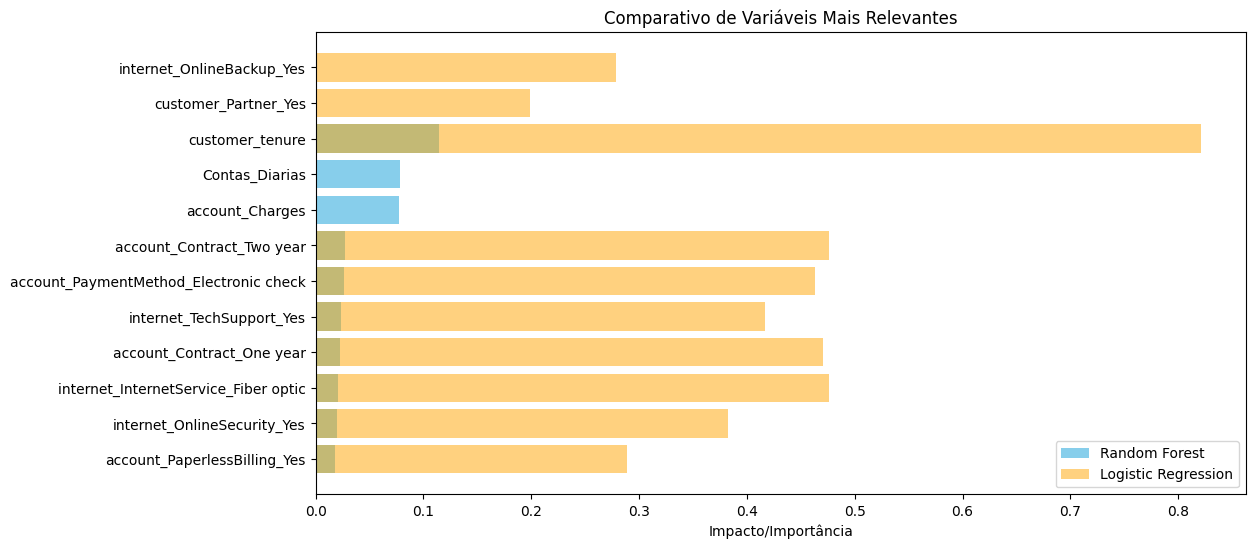

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

#coeficientes da regressão logística
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coef_LogReg': logreg.coef_[0]
})
coef_df['Impacto_LogReg'] = coef_df['Coef_LogReg'].abs()
top10_logreg = coef_df.sort_values(by='Impacto_LogReg', ascending=False).head(10)

# Variáveis importantes para random forrest
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importancia_RF': rf.feature_importances_
})
top10_rf = rf_importances.sort_values(by='Importancia_RF', ascending=False).head(10)

# Comparação com merge
comparativo = pd.merge(top10_logreg[['Feature', 'Coef_LogReg']],
                       top10_rf[['Feature', 'Importancia_RF']],
                       on='Feature', how='outer')

# Tabela
print("Top 10 variáveis mais relevantes - Comparativo LogReg x Random Forest")
display(comparativo)

#visualização pré montada
fig, ax = plt.subplots(figsize=(12,6))
comparativo_sorted = comparativo.sort_values(by='Importancia_RF', ascending=True)
ax.barh(comparativo_sorted['Feature'], comparativo_sorted['Importancia_RF'], color='skyblue', label='Random Forest')
ax.barh(comparativo_sorted['Feature'], comparativo_sorted['Coef_LogReg'].abs(), color='orange', alpha=0.5, label='Logistic Regression')
ax.set_xlabel('Impacto/Importância')
ax.set_title('Comparativo de Variáveis Mais Relevantes')
ax.legend()
plt.show()


A análise completa está no arquivo github